In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_surface
from scipy.optimize import newton
from scipy.integrate import quad
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(symmetric=True, ns=[1.2, 1.8, 1.2], Ts=[2, 2, 2])

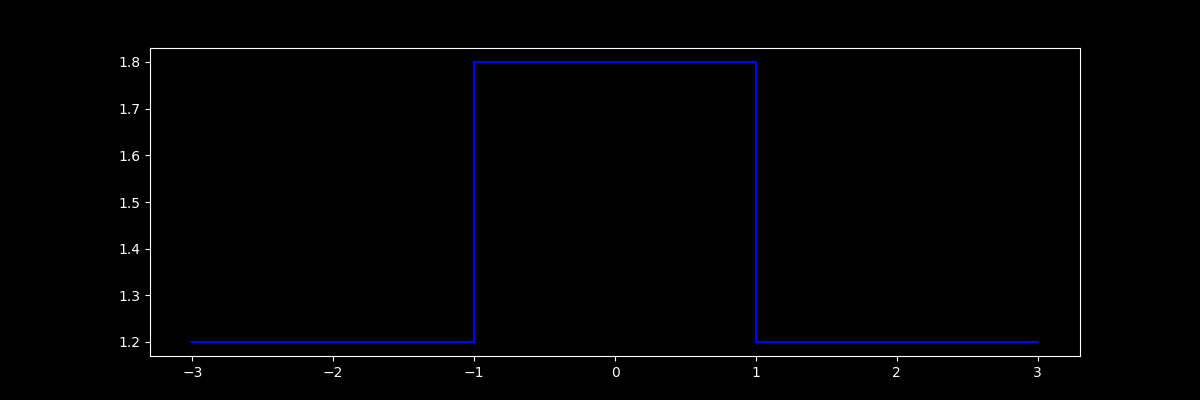

In [3]:
A.plot_refractive_index()

In [4]:
ft = 'TE'
mt = 'guided'

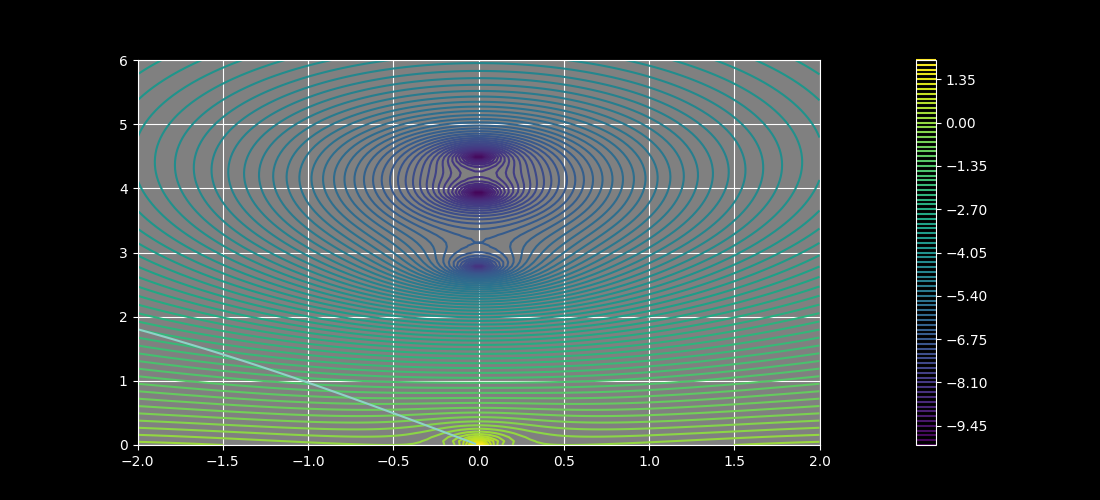

In [5]:
A.deteriminant_plot(-2, 2, 0, 6, mode_type=mt)

In [6]:
Z1 = newton(A.determinant_Z, np.array([4.6j]), args=(ft, mt))[0]
Z2 = newton(A.determinant_Z, np.array([4j]), args=(ft, mt))[0]
Z3 = newton(A.determinant_Z, np.array([2.7j]), args=(ft, mt))[0]

for Z in [Z1, Z2, Z3]:
    plt.plot(Z.real, Z.imag, marker='o', markersize=5)

In [7]:
Z1

(-3.69786085763594e-17+4.501631553123123j)

In [8]:
F1 = A.fields_Z(Z1)
F2 = A.fields_Z(Z2)
F3 = A.fields_Z(Z3)

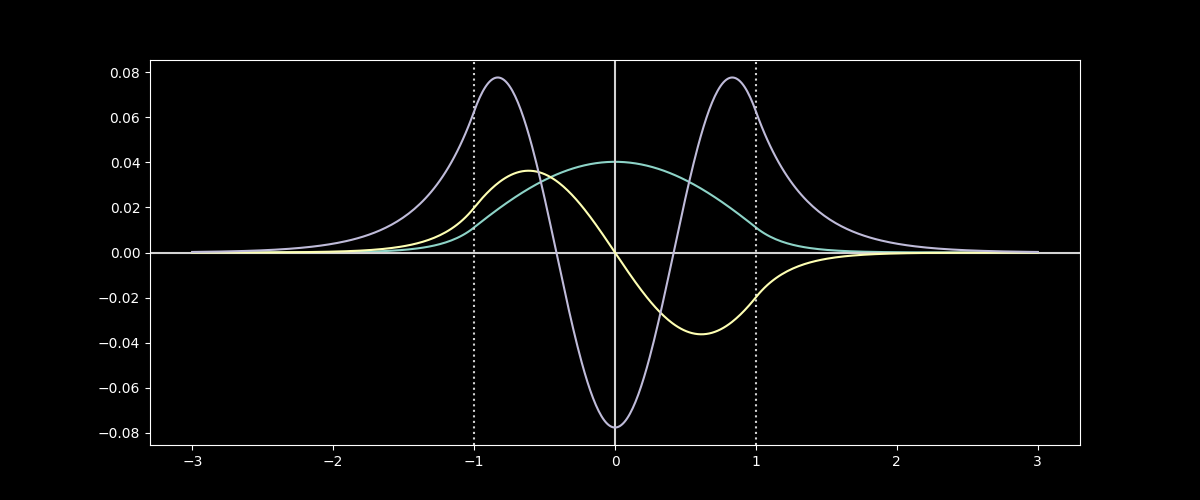

In [9]:
A.plot_field_1d(F1)
A.add_1d_plot(F2)
A.add_1d_plot(F3)

In [10]:
R1 = A.fields_Z(Z1, mode_type='radiation', rounding=9)
R2 = A.fields_Z(Z2, mode_type='radiation', sign='-1', rounding=9)
R3 = A.fields_Z(Z3, mode_type='radiation', rounding=9)


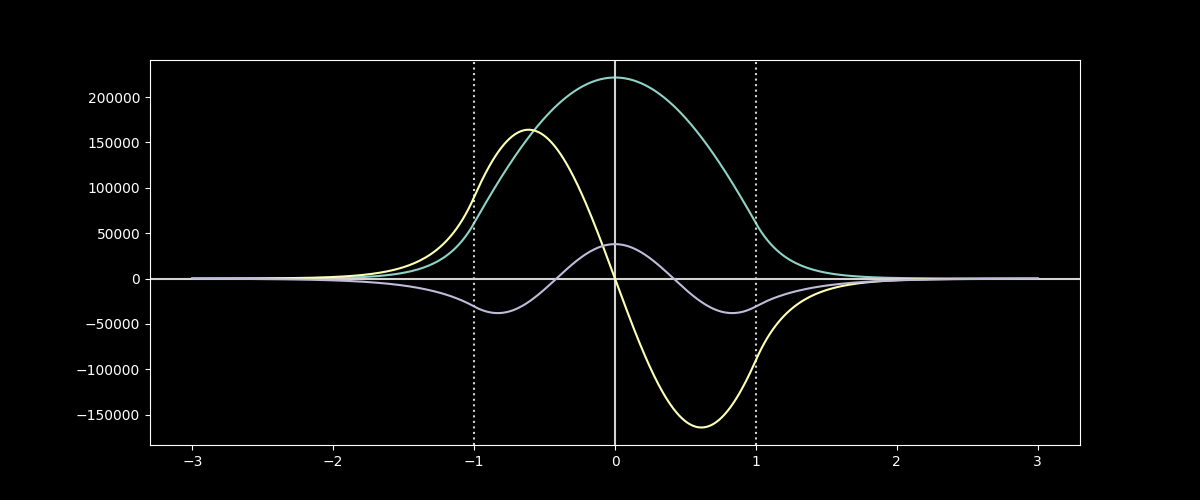

In [11]:
A.plot_field_1d(R1)
A.add_1d_plot(R2)
A.add_1d_plot(R3, part='imag')


(<Figure size 1200x500 with 1 Axes>, <Axes: >)

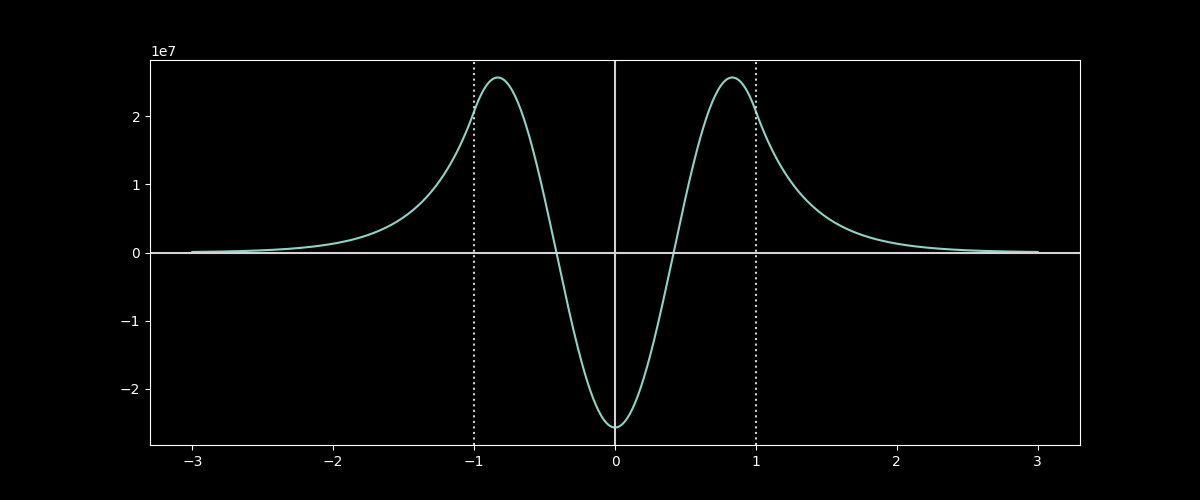

In [12]:
A.plot_field_1d(R3, part='real')

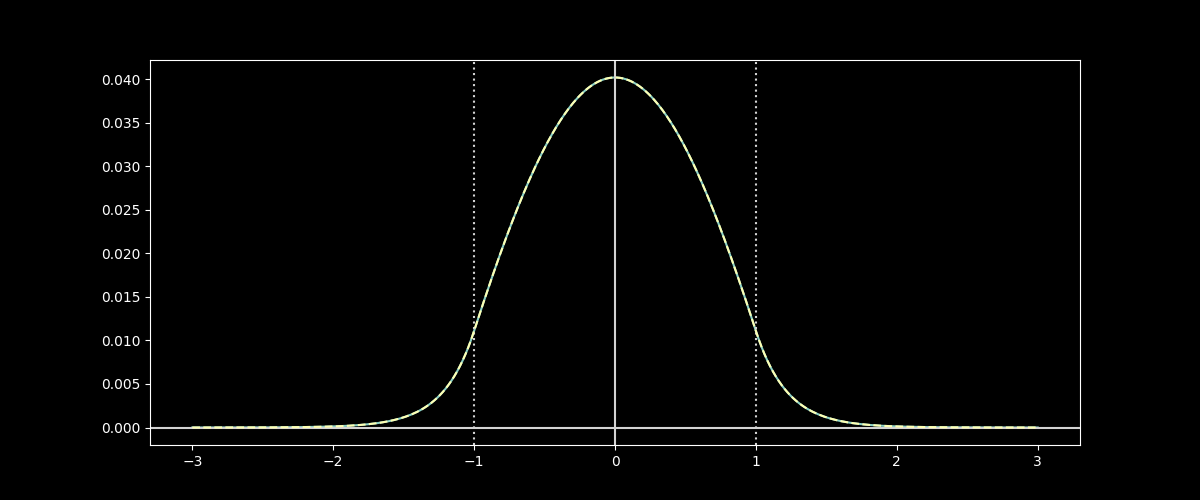

In [13]:
A.plot_field_1d(lambda x: F1(0) / R1(0) * R1(x))
A.add_1d_plot(F1, linestyle='--')
# A.add_1d_plot(R3, part='imag')


In [14]:
b = 1.25
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - (x/b)**2, 0]
    return np.piecewise(x, conds, funcs)
f0 = quadratic_piecewise

In [15]:
Propagator_Class = A.propagator()


In [16]:
P1 = Propagator_Class(A.circular_contour(Z1, 1e-5, 6, 'cw'), Lx=-b, Rx=b, f0=f0)
P2 = Propagator_Class(A.circular_contour(Z2, 1e-5, 6, 'cw'), Lx=-b, Rx=b, f0=f0)
P3 = Propagator_Class(A.circular_contour(Z3, 1e-5, 6, 'cw'), Lx=-b, Rx=b, f0=f0)

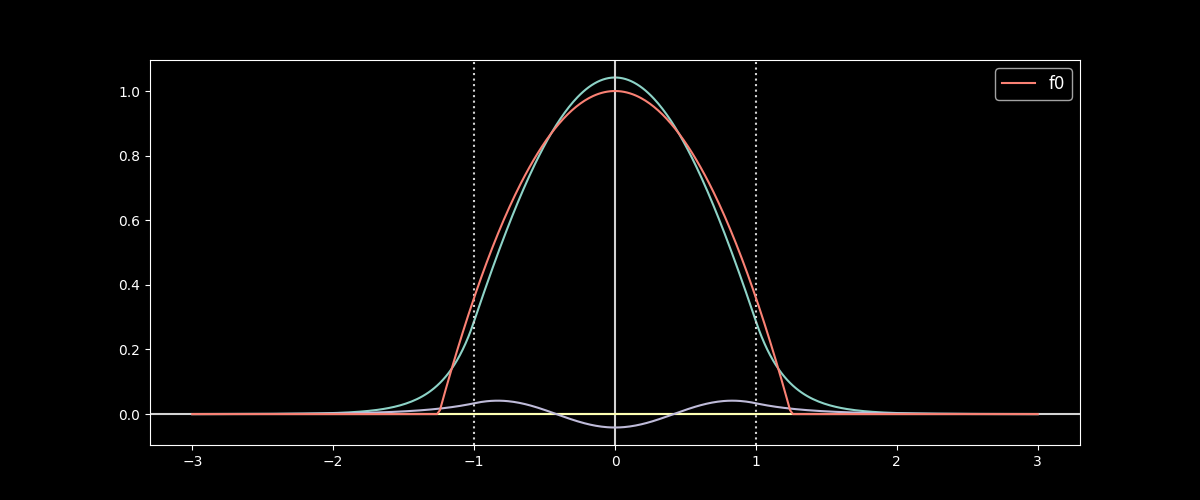

In [17]:
A.plot_field_1d(P1.slice_propagate)
A.add_1d_plot(P2.slice_propagate)
A.add_1d_plot(P3.slice_propagate)
A.add_1d_plot(f0, label='f0')

(<Figure size 900x600 with 2 Axes>, <Axes: >)

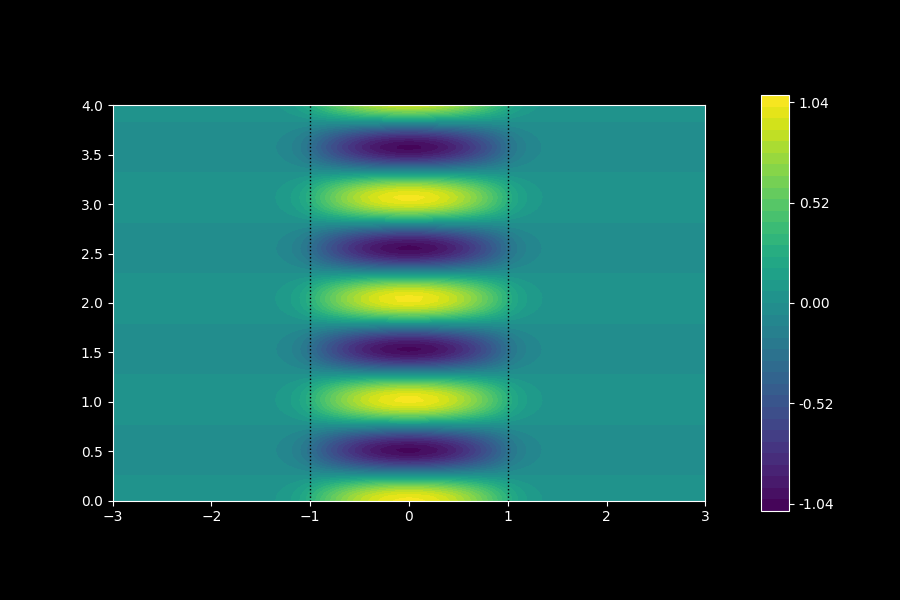

In [18]:
A.plot_field_2d(P1.propagate)

In [19]:
cf1 = quad(lambda x: f0(x) * F1(x), -b, b, complex_func=True)[0] 
cf3 = quad(lambda x: f0(x) * F3(x), -b, b, complex_func=True)[0]

cr1 = quad(lambda x: f0(x) * R1(x), -b, b, complex_func=True)[0]

alpha1 = cf1 / quad(lambda x: np.abs(F1(x))**2, -4, 4, complex_func=True)[0]
alpha3 = cf3 / quad(lambda x: np.abs(F3(x))**2, -4, 4, complex_func=True)[0]

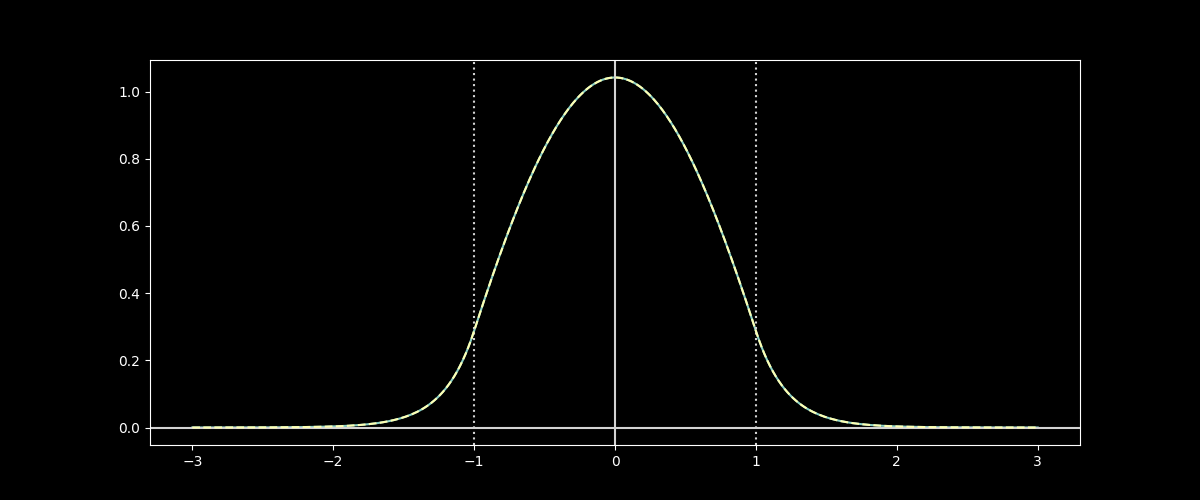

In [20]:
A.plot_field_1d(P1.slice_propagate)
A.add_1d_plot(lambda x: alpha1 * F1(x), linestyle='--')
# A.add_1d_plot(f0, label='f0')

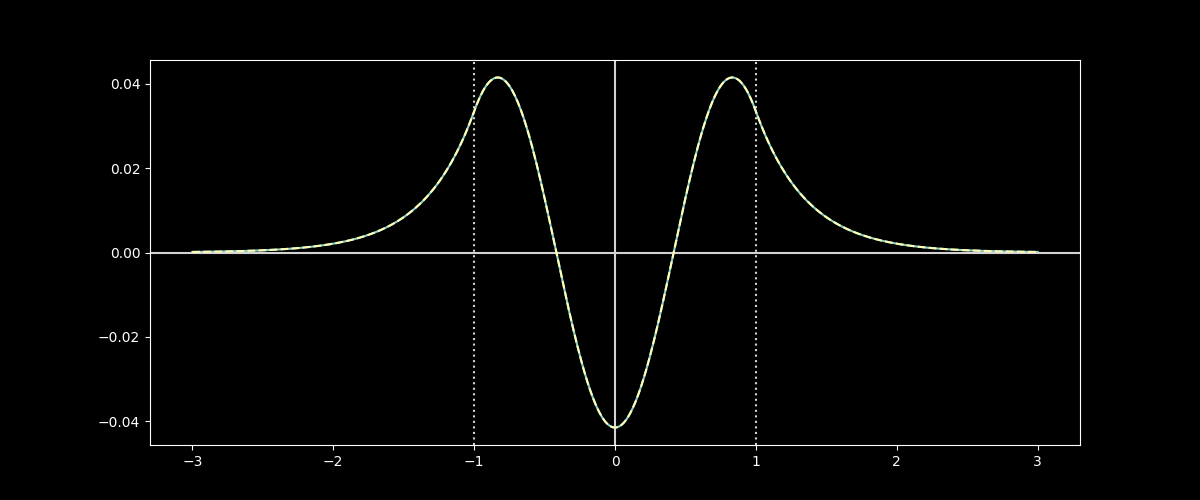

In [21]:
A.plot_field_1d(P3.slice_propagate)
A.add_1d_plot(lambda x: alpha3 * F3(x), linestyle='--')
# A.add_1d_plot(f0, label='f0')

In [30]:
x_offset = 0
orientation = 'cw'
rad = .01

P_imag1 = Propagator_Class(A.vertical_contour(x_offset, 0.00001, Z3.imag-rad, 40), f0=f0, Lx=-b, Rx=b)
P_half_circle1 = Propagator_Class(A.half_circle_contour(Z3 + x_offset, rad, 10, orientation, phase_shift=-np.pi/2), f0=f0, Lx=-b, Rx=b)
P_imag2 = Propagator_Class(A.vertical_contour(x_offset, Z3.imag+rad, Z2.imag-rad, 20), f0=f0, Lx=-b, Rx=b)
P_half_circle2 = Propagator_Class(A.half_circle_contour(Z2 + x_offset, rad, 10, orientation, phase_shift=-np.pi/2), f0=f0, Lx=-b, Rx=b)
P_imag3 = Propagator_Class(A.vertical_contour(x_offset, Z2.imag+rad, Z1.imag-rad, 100), f0=f0, Lx=-b, Rx=b)
P_half_circle3 = Propagator_Class(A.half_circle_contour(Z1 + x_offset, rad, 40, orientation, phase_shift=-np.pi/2), f0=f0, Lx=-b, Rx=b)
P_imag4 = Propagator_Class(A.vertical_contour(x_offset, Z1.imag+rad, 20, 100), f0=f0, Lx=-b, Rx=b)


(<Figure size 1100x400 with 1 Axes>, <Axes: >)

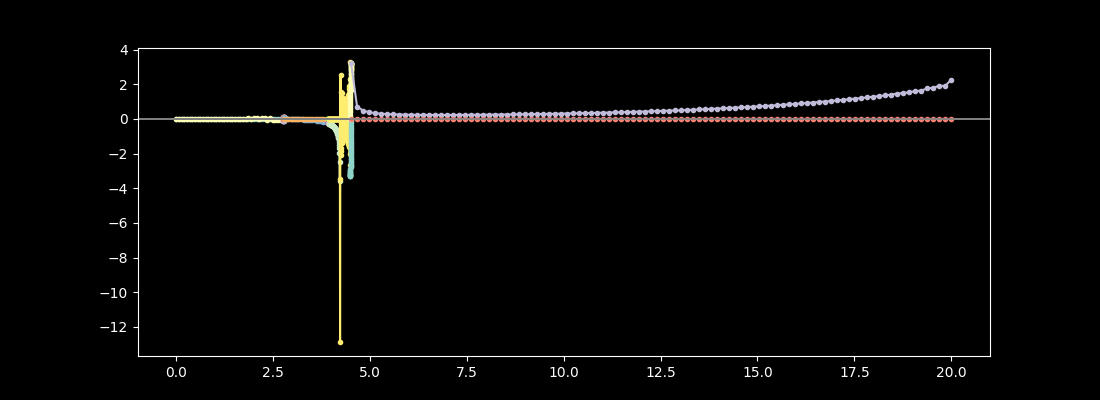

In [31]:
P_imag1.plot_transform()
P_imag1.plot_transform(part='imag', ax=plt.gca())
P_half_circle1.plot_transform(xs=P_half_circle1.Zs.imag, part='imag', ax=plt.gca())
P_half_circle1.plot_transform(xs=P_half_circle1.Zs.imag, part='real', ax=plt.gca())
P_imag2.plot_transform(part='real', ax=plt.gca())
P_imag2.plot_transform(part='imag', ax=plt.gca())
P_half_circle2.plot_transform(xs=P_half_circle2.Zs.imag, part='imag', ax=plt.gca())
P_half_circle2.plot_transform(xs=P_half_circle2.Zs.imag, part='real', ax=plt.gca())
P_imag3.plot_transform(part='real', ax=plt.gca())
P_imag3.plot_transform(part='imag', ax=plt.gca())

P_half_circle3.plot_transform(xs=P_half_circle3.Zs.imag, part='imag', ax=plt.gca())
P_half_circle3.plot_transform(xs=P_half_circle3.Zs.imag, part='real', ax=plt.gca())
P_imag4.plot_transform(part='real', ax=plt.gca())
P_imag4.plot_transform(part='imag', ax=plt.gca())

In [32]:
Ps = [
    P_imag1,
    P_half_circle1,
    P_imag2,
    P_half_circle2,
    P_imag3,
    P_half_circle3,
    P_imag4,
]
full = lambda x: sum([P.slice_propagate(x) for P in Ps])

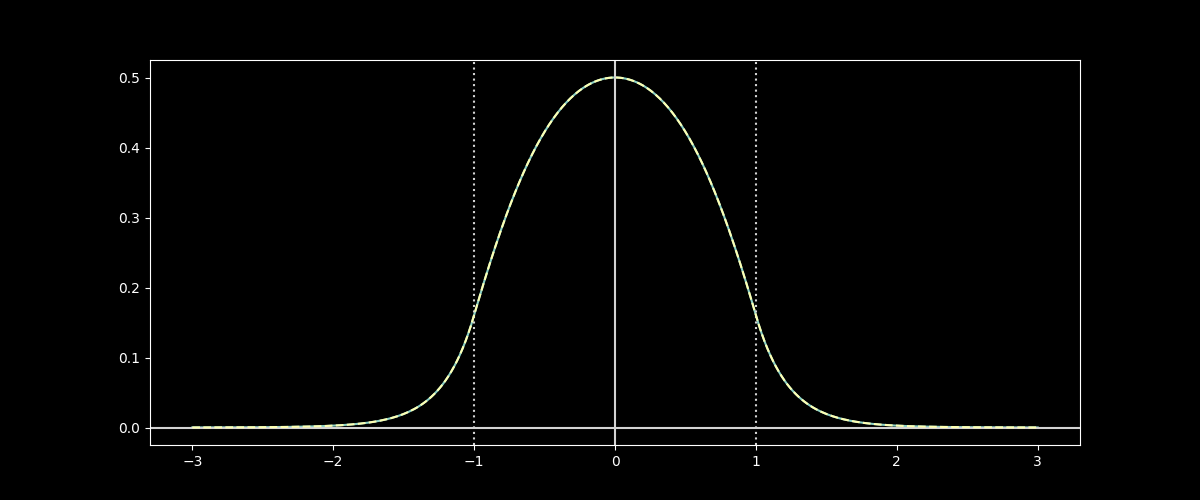

In [33]:
A.plot_field_1d(full)
A.add_1d_plot(lambda x: 1/2*(alpha1 * F1(x) + alpha3 * F3(x)), linestyle='--')


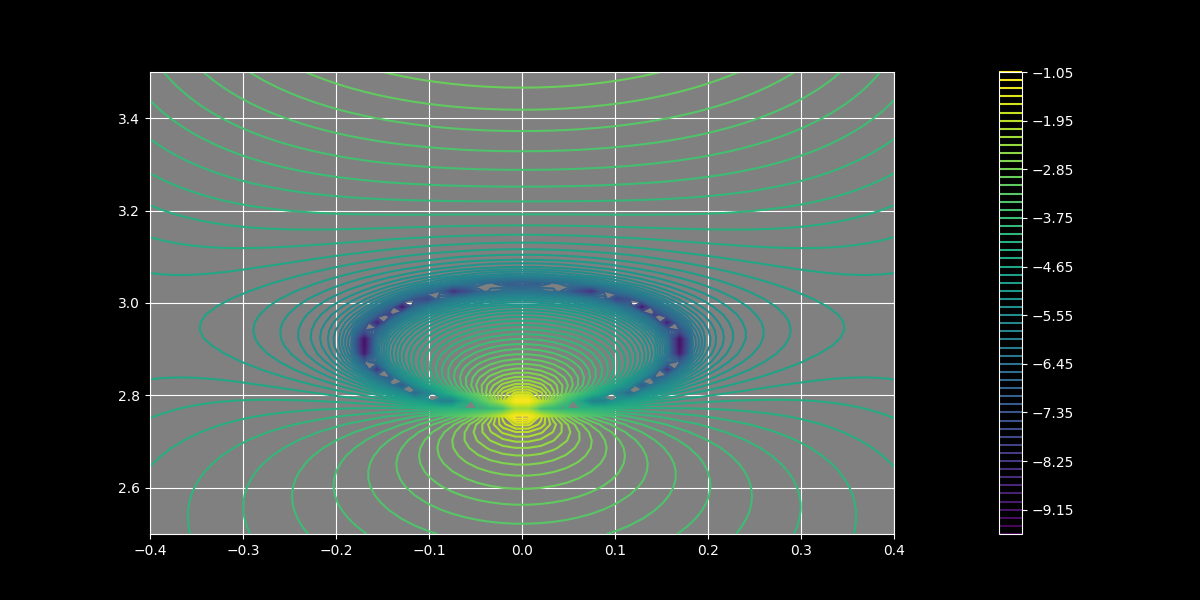

In [279]:
plot_complex(A.spectral_integrand, -.4, .4, 2.5, 3.5, (f0, 0, 0, -b, b, True), rref=60, iref=60, levels=60, part='real', log_abs=True)

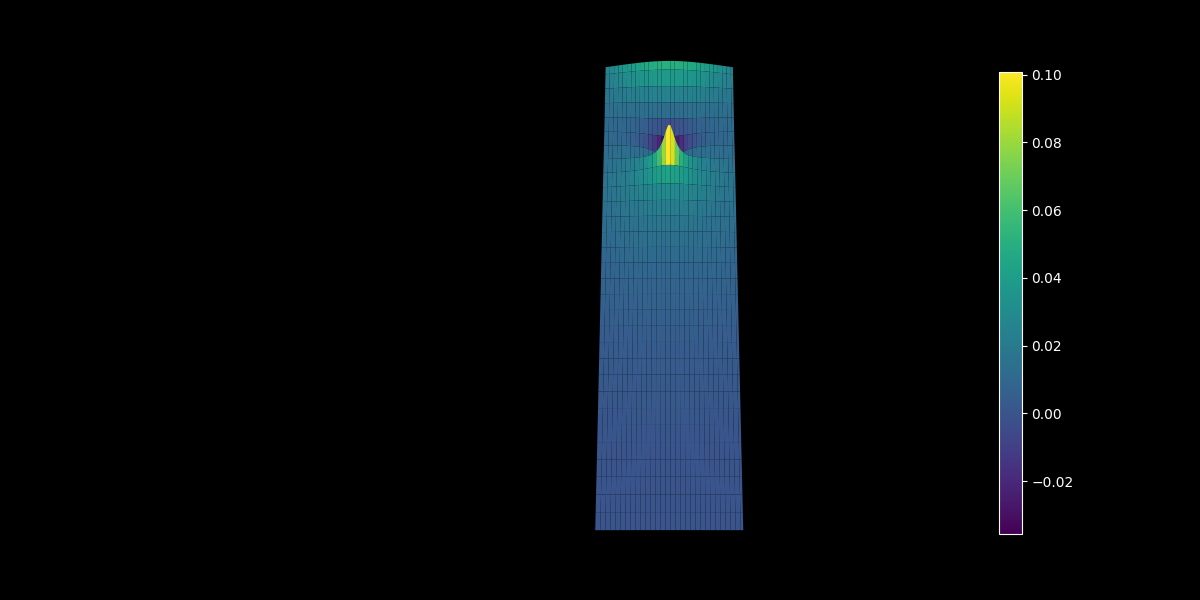

In [222]:
plot_complex_surface(A.spectral_integrand, -.4, .4, .01, 3.5, (f0, 0, 0, -b, b, True), rref=60, iref=60, part='real')

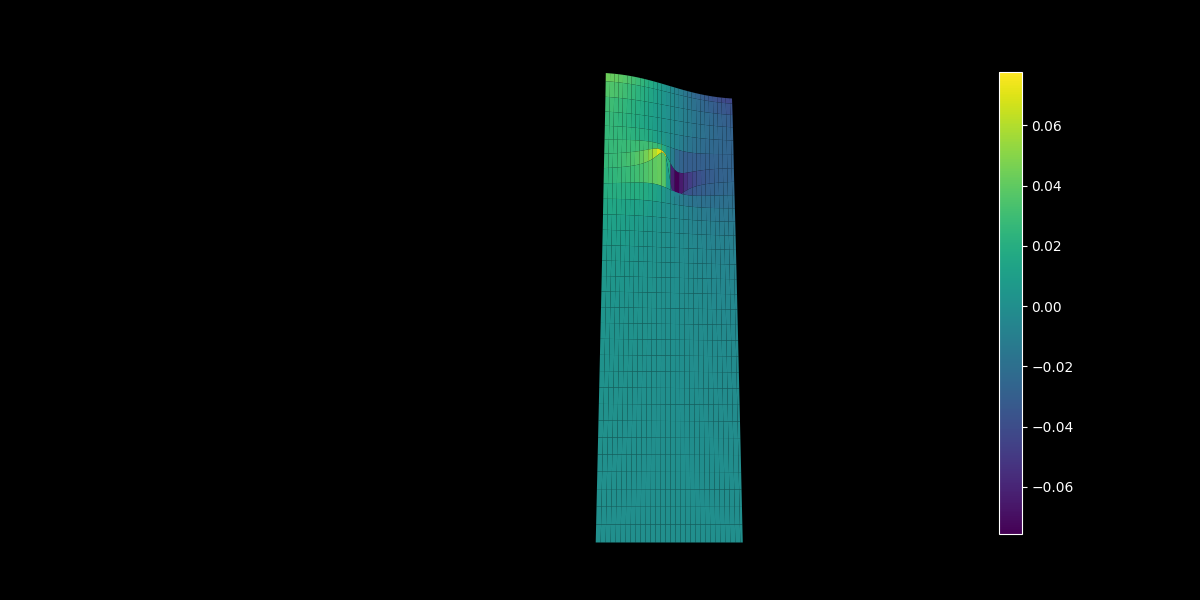

In [221]:
plot_complex_surface(A.spectral_integrand, -.4, .4,.01, 3.5, (f0, 0, 0, -b, b, True), rref=60, iref=60, part='imag')

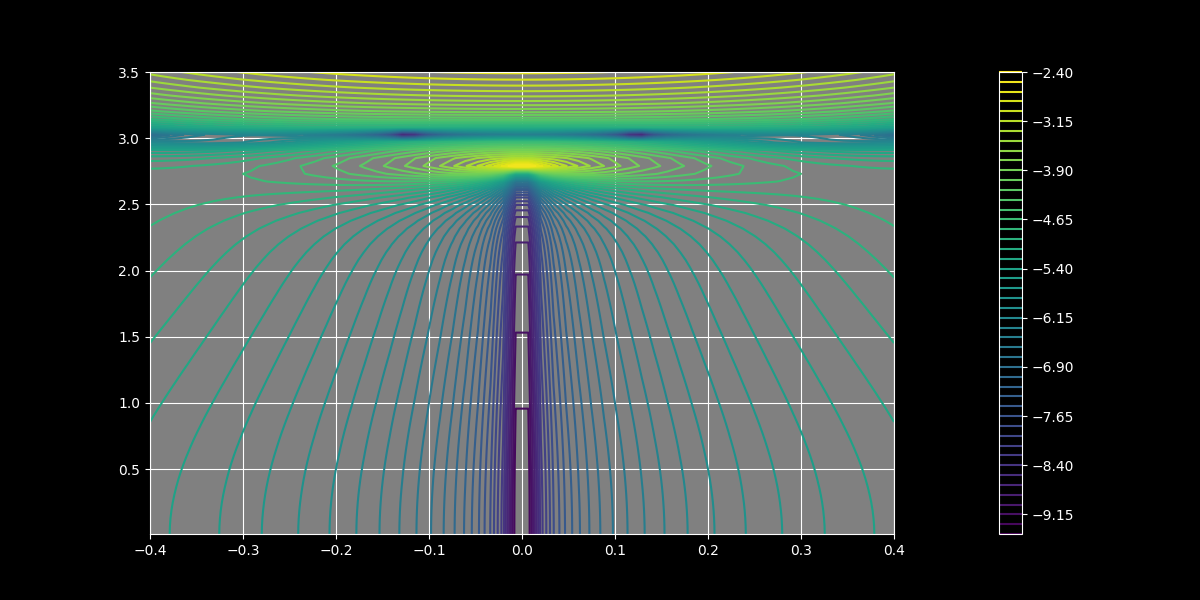

In [216]:
plot_complex(A.radiation_transform, -.4, .4, 0.01, 3.5, (f0, -b, b), rref=60, iref=60, levels=60, part='real', log_abs=True)

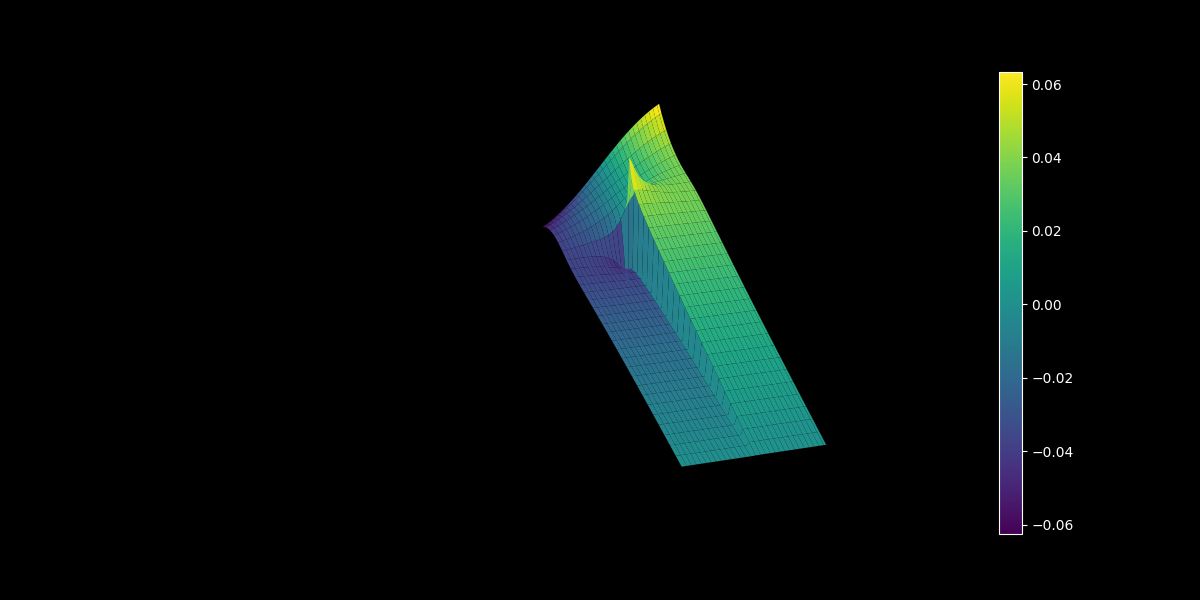

In [232]:
plot_complex_surface(A.radiation_transform, -.4, .4, 0.01, 3.5, (f0, -b, b), rref=60, iref=60, part='imag',
                    elev=30, azim=-105)

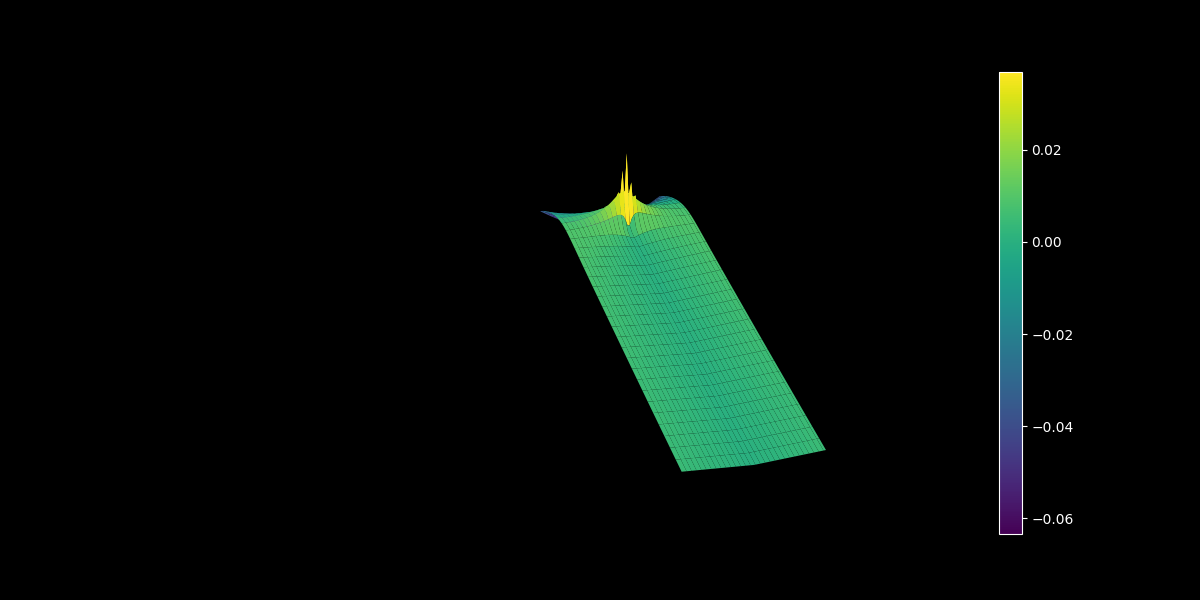

In [233]:
plot_complex_surface(A.radiation_transform, -.4, .4, 0.01, 3.5, (f0, -b, b), rref=60, iref=60, part='real',
                    elev=30, azim=-105)

In [228]:
x, z = 0, 1
x_offset = 0
ys = x_offset + np.linspace(0.0001, 6, 200) * 1j
Int = A.spectral_integrand(ys,f0, x, z, -b, b, True)
Trans = A.radiation_transform(ys, f0, -b, b)

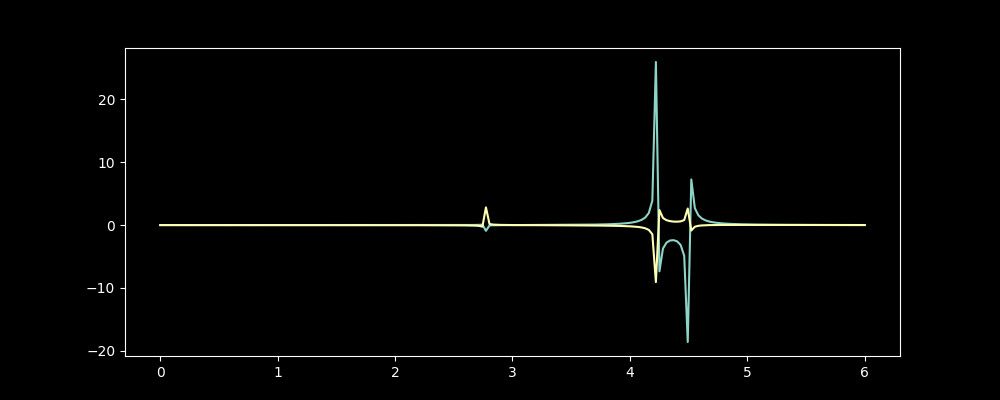

In [229]:
plt.close('all')
plt.figure(figsize=(10,4))
plt.plot(ys.imag, Int.real)
plt.plot(ys.imag, Int.imag)

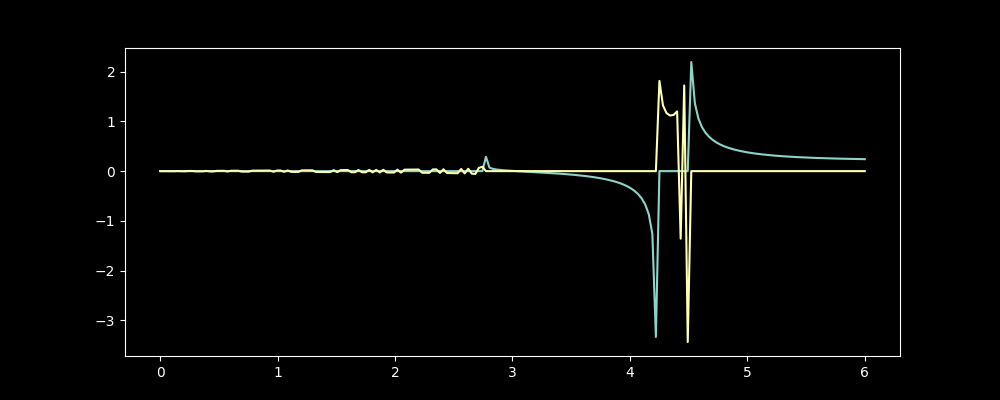

In [212]:
plt.close('all')
plt.figure(figsize=(10,4))
plt.plot(ys.imag, Trans.real)
plt.plot(ys.imag, Trans.imag)